# Ground Plane Surface Area Metrics x Discrimination Data

In [3]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load discrimination data

In [4]:
_dir = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination'
# _dir = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_discrimination'
# raw_dir = _dir + '/data/finalVEMatched/raw/'
zs_dir = _dir + '/data/finalDiscrimMatched/z_scored_RT/'

# final_data = pd.read_csv (raw_dir + '/raw_discrim.csv')
zscored_data = pd.read_csv (zs_dir + 'final_discrim.csv')

In [5]:
p = _dir + '/data/finalDiscrimMatched/performance.pkl'
unpickled_df = pd.read_pickle(p) 
len(unpickled_df)

path = 'depth_discrimination_stimuli/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4-target.png'

# unpickled_df[path]

len(unpickled_df)

156

## Load Ground Plane Metrics: Pixel SA

In [7]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/VGP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/VGP_size_dict.json'

vgp_size_dict = json.load(open(path))


In [8]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/GP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'

gp_size_dict = json.load(open(path))

In [9]:
VGPS = []
GPS = []
for key in vgp_size_dict:
    try:
        gp = gp_size_dict[key]
        VGPS.append(vgp_size_dict[key])
        GPS.append(gp)
    except:
        pass

print(stats.pearsonr(VGPS, GPS))

(0.6305436407876517, 4.100796404472425e-18)


In [10]:
# Find GP or VGP Outliers 

gpsize_list = [[key, gp_size_dict[key]] for key in gp_size_dict]
gpsize_mean = np.mean(np.array([elem[1] for elem in gpsize_list]))
gpsize_std = np.std(np.array([elem[1] for elem in gpsize_list]))

gpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_gpsize_dict = {}
for key in gp_size_dict:
    if gpsize_outlierRange[0] < gp_size_dict[key] < gpsize_outlierRange[1]:
        cleaned_gpsize_dict[key] = gp_size_dict[key]
    else:
        print(key, 'excluded')

002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize excluded


In [11]:
# Find GP or VGP Outliers 

vgpsize_list = [[key, vgp_size_dict[key]] for key in vgp_size_dict]
vgpsize_mean = np.mean(np.array([elem[1] for elem in vgpsize_list]))
vgpsize_std = np.std(np.array([elem[1] for elem in vgpsize_list]))

vgpsize_outlierRange = [vgpsize_mean - (3*vgpsize_std), vgpsize_mean + (3*vgpsize_std)]

cleaned_vgpsize_dict = {}
for key in vgp_size_dict:
    if vgpsize_outlierRange[0] < vgp_size_dict[key] < vgpsize_outlierRange[1]:
        cleaned_vgpsize_dict[key] = vgp_size_dict[key]
    else:
        print(key, 'excluded')

002568_2014-06-24_13-59-21_094959634447_rgbf000062-resize excluded
002600_2014-06-24_14-27-04_094959634447_rgbf000074-resize excluded
002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002570_2014-06-24_13-59-54_094959634447_rgbf000059-resize excluded


In [12]:
folders = [f.split('/')[1][:-2] for f in list(unpickled_df.keys())]
folders[0], list(unpickled_df.keys())[0]

('000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize',
 'depth_discrimination_stimuli/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4-target.png')

In [13]:
ordered_gp_size = []
ordered_vgp_size = []

gp_none = 0
vgp_none = 0
for folder in folders:
    try:
        ordered_gp_size.append(cleaned_gpsize_dict[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)
    try:
        ordered_vgp_size.append(cleaned_vgpsize_dict[folder])
    except:
        vgp_none += 1
        ordered_vgp_size.append(None)

In [14]:
len(ordered_gp_size), gp_none

(156, 7)

In [15]:
len(ordered_vgp_size), vgp_none

(156, 9)

In [16]:
discrim_pc_125 = [unpickled_df[img]['accuracy_125'][0] for img in unpickled_df]
discrim_pc_250 = [unpickled_df[img]['accuracy_250'][0] for img in unpickled_df]
discrim_pc_1000 = [unpickled_df[img]['accuracy_1000'][0] for img in unpickled_df]


discrim_zsRT_125 = [unpickled_df[img]['zsRT_125'][1] for img in unpickled_df]
discrim_zsRT_250 = [unpickled_df[img]['zsRT_250'][1] for img in unpickled_df]
discrim_zsRT_1000 = [unpickled_df[img]['zsRT_1000'][1] for img in unpickled_df]


discrim_VE_depthdifference_125 = [unpickled_df[img]['VE_depthdifference_125'] for img in unpickled_df]
discrim_VE_depthdifference_250 = [unpickled_df[img]['VE_depthdifference_250'] for img in unpickled_df]
discrim_VE_depthdifference_1000 = [unpickled_df[img]['VE_depthdifference_1000'] for img in unpickled_df]

In [81]:
# difference in clutter between the two images in a discrimination trial
discrim_GP_diff = []
discrim_VGP_diff = []

trunc_discrim_pc_125 = []
trunc_discrim_pc_250 = []
trunc_discrim_pc_1000 = []

trunc_discrim_zsRT_125 = []
trunc_discrim_zsRT_250 = []
trunc_discrim_zsRT_1000 = []

trunc_discrim_VE_depthdifference_125 = []
trunc_discrim_VE_depthdifference_250 = []
trunc_discrim_VE_depthdifference_1000 = []

trunc_imgs = []

n = 0
for i in range(len(unpickled_df)):
    img = list(unpickled_df.keys())[i]
    if type(ordered_gp_size[i]) == float: 
        s1 = unpickled_df[img]['stimulus_1'].split('/')[1][:-2]
        s1_index = folders.index(s1)
        if type(ordered_gp_size[s1_index]) == float:
        
            try:

                s0_vgp = ordered_vgp_size[i]
                s1_vgp = ordered_vgp_size[s1_index]
#                 discrim_VGP_diff.append(abs(s0_vgp - s1_vgp)/(s0_vgp + s1_vgp))
                discrim_VGP_diff.append(abs(s0_vgp - s1_vgp))
                
                trunc_discrim_pc_125.append(discrim_pc_125[i])
                trunc_discrim_pc_250.append(discrim_pc_250[i])
                trunc_discrim_pc_1000.append(discrim_pc_1000[i])

                trunc_discrim_zsRT_125.append(discrim_zsRT_125[i])
                trunc_discrim_zsRT_250.append(discrim_zsRT_250[i])
                trunc_discrim_zsRT_1000.append(discrim_zsRT_1000[i])

                trunc_discrim_VE_depthdifference_125.append(discrim_VE_depthdifference_125[i])
                trunc_discrim_VE_depthdifference_250.append(discrim_VE_depthdifference_250[i])
                trunc_discrim_VE_depthdifference_1000.append(discrim_VE_depthdifference_1000[i])
                
                
                
                s0_gp = ordered_gp_size[i]
                s1_gp = ordered_gp_size[s1_index]
#                 discrim_GP_diff.append(abs(s0_gp - s1_gp)/(s0_gp + s1_gp))
                discrim_GP_diff.append(abs(s0_gp - s1_gp))

                trunc_imgs.append(img)


                n += 1
            except:
                pass
n, len(trunc_discrim_pc_1000), len(discrim_VGP_diff)       

(138, 138, 138)

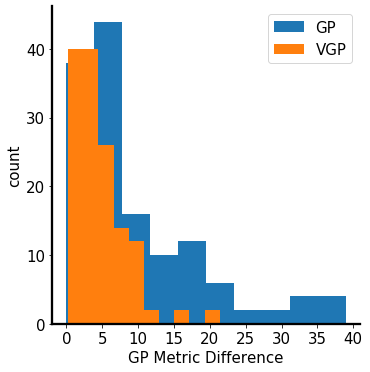

In [82]:
ig, ax = plt.subplots(figsize=[5,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel('count', fontsize=15)
plt.xlabel('GP Metric Difference', fontsize=15)

plt.hist(discrim_GP_diff, label='GP')
plt.hist(discrim_VGP_diff, label='VGP')

plt.legend(fontsize=15)

plt.show();

### Complete Ground Plane

In [83]:
trunc_avg_pc = np.mean([np.array(trunc_discrim_pc_125), np.array(trunc_discrim_pc_250), np.array(trunc_discrim_pc_1000)], axis =0)
len(trunc_avg_pc), len(discrim_GP_diff)


(138, 138)

In [84]:
# print('Correlation between Discrimination PC and Complete GP difference')
print('Correlation between Discrimination PC and abs(gp0-gp1)/(gp0+gp1)')

print('125 ms: ',stats.pearsonr(trunc_discrim_pc_125, discrim_GP_diff))
print('250 ms: ',stats.pearsonr(trunc_discrim_pc_250, discrim_GP_diff))
print('1000 ms: ',stats.pearsonr(trunc_discrim_pc_1000, discrim_GP_diff))

print('Avg: ',stats.pearsonr(trunc_avg_pc, discrim_GP_diff))

print('All: ',stats.pearsonr(trunc_discrim_pc_125 + trunc_discrim_pc_250 + trunc_discrim_pc_1000, discrim_GP_diff*3))

Correlation between Discrimination PC and abs(gp0-gp1)/(gp0+gp1)
125 ms:  (0.1190062593478195, 0.16445705294519408)
250 ms:  (0.12305166968912937, 0.15047611931458052)
1000 ms:  (0.07418691946420117, 0.38716815698106744)
Avg:  (0.11195230534274994, 0.19111319874136593)
All:  (0.10104974337961377, 0.039868909099877545)


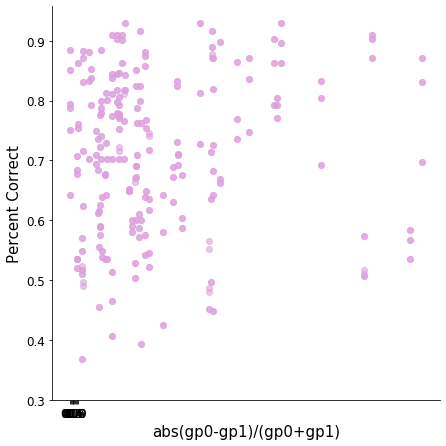

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(discrim_GP_diff*3, trunc_discrim_pc_125 + trunc_discrim_pc_250 + trunc_discrim_pc_1000, 'o', color='plum', alpha=0.6)
plt.tight_layout()
plt.xlabel('abs(gp0-gp1)/(gp0+gp1)', fontsize=15)
plt.ylabel('Percent Correct', fontsize=15)

plt.xticks(np.arange(0,1, 0.1),fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(np.arange(0.3,1, 0.1),fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [86]:
trunc_avg_zsRT = np.mean([np.array(trunc_discrim_zsRT_125), np.array(trunc_discrim_zsRT_250), np.array(trunc_discrim_zsRT_1000)], axis =0)


In [87]:
# print('Correlation between Discrimination z-scored RT and Complete GP difference')
print('Correlation between Discrimination z-scored RT and abs(gp0-gp1)/(gp0+gp1)')

print('125 ms: ',stats.pearsonr(trunc_discrim_zsRT_125, discrim_GP_diff))
print('250 ms: ',stats.pearsonr(trunc_discrim_zsRT_250, discrim_GP_diff))
print('1000 ms: ',stats.pearsonr(trunc_discrim_zsRT_1000, discrim_GP_diff))

print('Avg: ',stats.pearsonr(trunc_avg_zsRT, discrim_GP_diff))

print('All: ',stats.pearsonr(trunc_discrim_zsRT_125 + trunc_discrim_zsRT_250 + trunc_discrim_zsRT_1000, discrim_GP_diff*3))

Correlation between Discrimination z-scored RT and abs(gp0-gp1)/(gp0+gp1)
125 ms:  (-0.02829339786307626, 0.7418421123484402)
250 ms:  (-0.10647303365925115, 0.2138920006473651)
1000 ms:  (-0.19076369538632768, 0.025012773587951002)
Avg:  (-0.11044711005867122, 0.19718699545620205)
All:  (-0.09942106461634638, 0.043195495871758756)


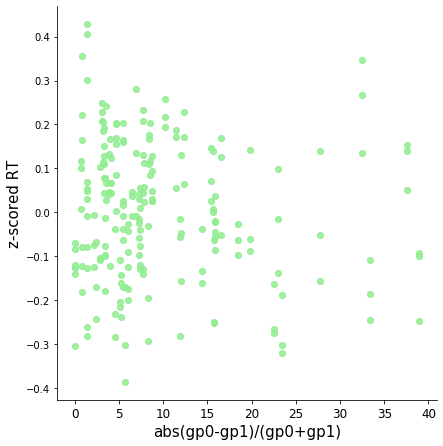

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(discrim_GP_diff*3, trunc_discrim_zsRT_125 + trunc_discrim_zsRT_250 + trunc_discrim_zsRT_1000, 'o', color='lightgreen', alpha=0.6)
plt.tight_layout()
plt.xlabel('abs(gp0-gp1)/(gp0+gp1)', fontsize=15)
plt.ylabel('z-scored RT', fontsize=15)

# plt.yticks(np.arange(-1.6,1.8, 0.4),fontsize=12)
plt.xticks(fontsize=12)
plt.show();

In [89]:
trunc_avg_VE_depthdifference = np.mean([np.array(trunc_discrim_VE_depthdifference_125), np.array(trunc_discrim_VE_depthdifference_250), np.array(trunc_discrim_VE_depthdifference_1000)], axis =0)


In [90]:
print('Correlation between VE Diff and abs(gp0-gp1)/(gp0+gp1)')
print('125 ms: ',stats.pearsonr(trunc_discrim_VE_depthdifference_125, discrim_GP_diff))
print('250 ms: ',stats.pearsonr(trunc_discrim_VE_depthdifference_250, discrim_GP_diff))
print('1000 ms: ',stats.pearsonr(trunc_discrim_VE_depthdifference_1000, discrim_GP_diff))

print('Avg: ',stats.pearsonr(trunc_avg_VE_depthdifference, discrim_GP_diff))

print('All: ',stats.pearsonr(trunc_discrim_VE_depthdifference_125 + trunc_discrim_VE_depthdifference_250 + trunc_discrim_VE_depthdifference_1000, discrim_GP_diff*3))

Correlation between VE Diff and abs(gp0-gp1)/(gp0+gp1)
125 ms:  (0.12009512310110419, 0.16060216831776905)
250 ms:  (0.19327699936973788, 0.023128886452557455)
1000 ms:  (0.2060840752495163, 0.01530799839917918)
Avg:  (0.17528107857945907, 0.039753136338565496)
All:  (0.17281128751451907, 0.00041216741695645353)


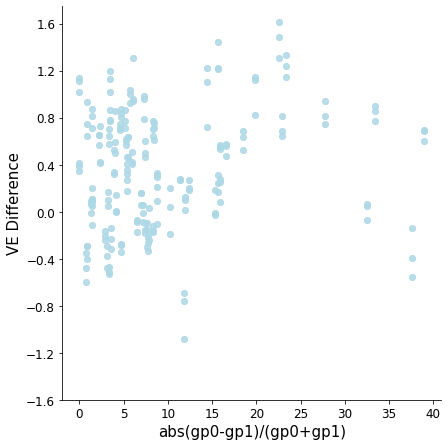

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(discrim_GP_diff*3, trunc_discrim_VE_depthdifference_125 + trunc_discrim_VE_depthdifference_250 + trunc_discrim_VE_depthdifference_1000, 'o', color='lightblue', alpha=0.6)
plt.tight_layout()
plt.xlabel('abs(gp0-gp1)/(gp0+gp1)', fontsize=15)
plt.ylabel('VE Difference', fontsize=15)

plt.yticks(np.arange(-1.6,1.8, 0.4),fontsize=12)
plt.xticks(fontsize=12)
plt.show();

### Visible Ground Plane

In [92]:
trunc_avg_pc = np.mean([np.array(trunc_discrim_pc_125), np.array(trunc_discrim_pc_250), np.array(trunc_discrim_pc_1000)], axis =0)
len(trunc_avg_pc), len(discrim_GP_diff)


(138, 138)

In [93]:
print('Correlation between Discrimination PC and abs(vgp0-vgp1)/(vgp0+vgp1)')
print('125 ms: ',stats.pearsonr(trunc_discrim_pc_125, discrim_VGP_diff))
print('250 ms: ',stats.pearsonr(trunc_discrim_pc_250, discrim_VGP_diff))
print('1000 ms: ',stats.pearsonr(trunc_discrim_pc_1000, discrim_VGP_diff))

print('Avg: ',stats.pearsonr(trunc_avg_pc, discrim_VGP_diff))

print('All: ',stats.pearsonr(trunc_discrim_pc_125 + trunc_discrim_pc_250 + trunc_discrim_pc_1000, discrim_VGP_diff*3))

Correlation between Discrimination PC and abs(vgp0-vgp1)/(vgp0+vgp1)
125 ms:  (0.016905931696839932, 0.8439783074480242)
250 ms:  (0.017139090176074123, 0.841854429658049)
1000 ms:  (0.03053682223714984, 0.722180273527159)
Avg:  (0.023331289891253312, 0.7859107170895935)
All:  (0.021059154155052853, 0.6692029052653453)


In [94]:
trunc_avg_zsRT = np.mean([np.array(trunc_discrim_zsRT_125), np.array(trunc_discrim_zsRT_250), np.array(trunc_discrim_zsRT_1000)], axis =0)


In [95]:
print('Correlation between Discrimination z-scored RT and abs(vgp0-vgp1)/(vgp0+vgp1)')
print('125 ms: ',stats.pearsonr(trunc_discrim_zsRT_125, discrim_VGP_diff))
print('250 ms: ',stats.pearsonr(trunc_discrim_zsRT_250, discrim_VGP_diff))
print('1000 ms: ',stats.pearsonr(trunc_discrim_zsRT_1000, discrim_VGP_diff))

print('Avg: ',stats.pearsonr(trunc_avg_zsRT, discrim_VGP_diff))

print('All: ',stats.pearsonr(trunc_discrim_zsRT_125 + trunc_discrim_zsRT_250 + trunc_discrim_zsRT_1000, discrim_VGP_diff*3))

Correlation between Discrimination z-scored RT and abs(vgp0-vgp1)/(vgp0+vgp1)
125 ms:  (-0.016164384725422115, 0.8507405668551205)
250 ms:  (0.10417677225422867, 0.22399252890121224)
1000 ms:  (-0.06167205246877625, 0.4724015077484258)
Avg:  (0.013970406351229585, 0.8708095561908643)
All:  (0.012575726715025683, 0.7986345730746836)


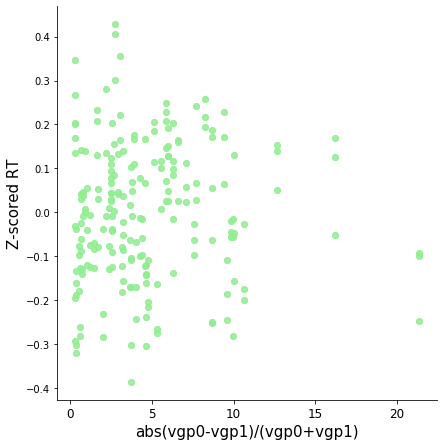

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(discrim_VGP_diff*3, trunc_discrim_zsRT_125 + trunc_discrim_zsRT_250 + trunc_discrim_zsRT_1000, 'o', color='lightgreen', alpha=0.6)
plt.tight_layout()
plt.xlabel('abs(vgp0-vgp1)/(vgp0+vgp1)', fontsize=15)
plt.ylabel('Z-scored RT', fontsize=15)

plt.xticks(fontsize=12)
plt.show();

In [97]:
trunc_avg_VE_depthdifference = np.mean([np.array(trunc_discrim_VE_depthdifference_125), np.array(trunc_discrim_VE_depthdifference_250), np.array(trunc_discrim_VE_depthdifference_1000)], axis =0)


In [98]:
print('Correlation between VE Diff and abs(vgp0-vgp1)/(vgp0+vgp1)')
print('125 ms: ',stats.pearsonr(trunc_discrim_VE_depthdifference_125, discrim_VGP_diff))
print('250 ms: ',stats.pearsonr(trunc_discrim_VE_depthdifference_250, discrim_VGP_diff))
print('1000 ms: ',stats.pearsonr(trunc_discrim_VE_depthdifference_1000, discrim_VGP_diff))

print('Avg: ',stats.pearsonr(trunc_avg_VE_depthdifference, discrim_VGP_diff))

print('All: ',stats.pearsonr(trunc_discrim_VE_depthdifference_125 + trunc_discrim_VE_depthdifference_250 + trunc_discrim_VE_depthdifference_1000, discrim_VGP_diff*3))

Correlation between VE Diff and abs(vgp0-vgp1)/(vgp0+vgp1)
125 ms:  (-0.05142419693444504, 0.5491734062739299)
250 ms:  (-0.06262297011704132, 0.46558674279552986)
1000 ms:  (-0.03911820198342141, 0.6487284589244795)
Avg:  (-0.0517511969986929, 0.5466329125906562)
All:  (-0.051021998816075734, 0.30035149288223034)


## Global Mean Depth - THIS IS WRONG - NEED TO CALCULATE AVG MEAN DEPTH FOR A DISCRIM TRIAL

In [99]:
from PIL import Image, ImageStat

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

# stimuli_path = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli'
# kinect192_path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUNRGBD/kinect2data_192'

In [100]:
globalMeanDepths = []
for img in trunc_imgs:
    folder = img.split('/')[1][:-2]
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [101]:
len(discrim_VGP_diff), len(globalMeanDepths)

(138, 138)

In [103]:
print('Global Mean Depth x VGP Diff: ',stats.pearsonr(globalMeanDepths, discrim_VGP_diff))

print('Global Mean Depth x GP Diff: ',stats.pearsonr(globalMeanDepths, discrim_GP_diff))


Global Mean Depth x VGP Diff:  (0.24805393335361786, 0.0033520819910944177)
Global Mean Depth x GP Diff:  (0.13381235511249623, 0.11765646495750183)
